In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

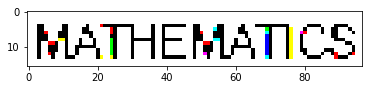

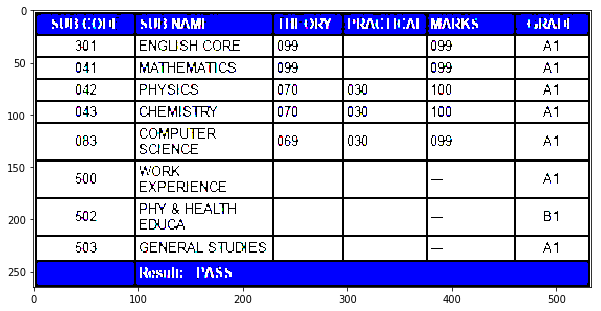

In [199]:
img = cv2.imread("8.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
math = cv2.imread("0.png")
ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, math = cv2.threshold(math, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((2,2),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
opening1 = cv2.morphologyEx(math, cv2.MORPH_OPEN, kernel)
plt.imshow(opening1)
plt.show()

plt.figure(figsize =(10, 8))
plt.imshow(opening)

In [162]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(math,None)
kp2, des2 = sift.detectAndCompute(opening,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance < 0.70*match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(math,kp1,opening,kp2,good,None,flags=2)

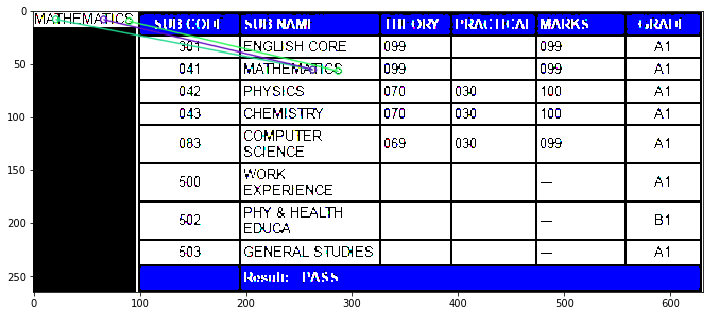

In [163]:
display(sift_matches)

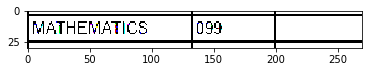

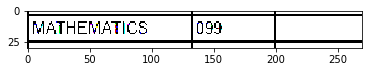

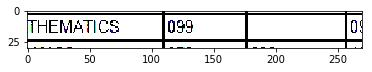

In [166]:
for ide in good:
    idx = ide[0].trainIdx
    pt = kp2[idx]
    x, y = pt.pt
    plt.imshow(img[int(y)-15:int(y)+15, int(x)-0:int(x)+200,:])
    plt.show()

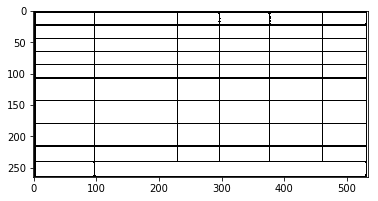

In [171]:
image, contours, hierarchy = cv2.findContours(cv2.cvtColor(opening, cv2.COLOR_BGR2GRAY), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
external_contours = np.zeros(image.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)
plt.imshow(external_contours, cmap='gray')

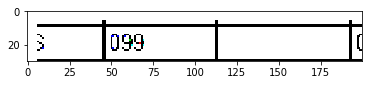

(30, 200, 3)
(30, 200)
(30, 200)
(30, 200)


error: OpenCV(3.4.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<1,-1,-1>,struct cv::Set<3,4,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'


In [267]:
# Create empty array to hold internal contours
kernel = np.zeros((4,4),np.uint8)
img1 = img[int(y)-15:int(y)+15, int(x)-0:int(x)+200,:]
erosion1 = cv2.erode(img1,kernel,iterations =3)
plt.imshow(erosion1)
plt.show()
print(erosion1.shape)
image, contours, hierarchy = cv2.findContours(cv2.cvtColor(erosion1, cv2.COLOR_BGR2GRAY), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

image_internal = np.zeros(image.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
kernel2 = np.ones((2, 2), np.uint8)
print(image_internal.shape)
final_res = cv2.erode(image_internal,kernel2,iterations =1)
print(final_res.shape)
final_res = cv2.cvtColor(final_res, cv2.COLOR_GRAY2BGR)
image, contours, hierarchy = cv2.findContours(final_res, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(final_res, contours, 0, 255, -1)
plt.figure(figsize = (10, 8))
plt.imshow(final_res, cmap='gray')

In [227]:
ori_test = final_res.copy()
test_img = cv2.resize(test_img, (54, 54))
test_img = ms.preprocess(test_img)
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)
value = []
for pred in prediction:
    value.append(np.argmax(pred))
    
print(value[:value[-1]])
result = "".join(value[0:2])


[array([[[199,  15]],
 
        [[198,  16]],
 
        [[198,  21]],
 
        [[199,  22]]], dtype=int32),
 array([[[194,  10]],
 
        [[194,  28]],
 
        [[199,  28]],
 
        [[199,  24]],
 
        [[198,  24]],
 
        [[196,  22]],
 
        [[196,  15]],
 
        [[198,  13]],
 
        [[199,  13]],
 
        [[199,  10]]], dtype=int32),
 array([[[114,  10]],
 
        [[114,  28]],
 
        [[191,  28]],
 
        [[191,  10]]], dtype=int32),
 array([[[ 47,  10]],
 
        [[ 47,  28]],
 
        [[111,  28]],
 
        [[111,  10]]], dtype=int32),
 array([[[64, 23]],
 
        [[65, 22]],
 
        [[67, 22]],
 
        [[68, 23]],
 
        [[67, 24]],
 
        [[65, 24]]], dtype=int32),
 array([[[57, 23]],
 
        [[58, 22]],
 
        [[60, 22]],
 
        [[61, 23]],
 
        [[60, 24]],
 
        [[58, 24]]], dtype=int32),
 array([[[63, 22]],
 
        [[64, 21]],
 
        [[65, 22]],
 
        [[64, 23]]], dtype=int32),
 array([[[56, 22]],
 
       

In [ ]:
def main(img, text = '0'):
    img = cv2.imread("8.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    math = cv2.imread("0.png")
    ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    ret, math = cv2.threshold(math, 127, 255, cv2.THRESH_BINARY)
    kernel = np.ones((2,2),np.uint8)
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    opening1 = cv2.morphologyEx(math, cv2.MORPH_OPEN, kernel)
    # Create empty array to hold internal contours
    kernel = np.zeros((4,4),np.uint8)
    img1 = img[int(y)-15:int(y)+15, int(x)-0:int(x)+200,:]
    erosion1 = cv2.erode(img1,kernel,iterations =3)
    plt.imshow(erosion1)
    plt.show()
    print(erosion1.shape)
    image, contours, hierarchy = cv2.findContours(cv2.cvtColor(erosion1, cv2.COLOR_BGR2GRAY), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    image_internal = np.zeros(image.shape)

    # Iterate through list of contour arrays
    for i in range(len(contours)):
        # If third column value is NOT equal to -1 than its internal
        if hierarchy[0][i][3] != -1:

            # Draw the Contour
            cv2.drawContours(image_internal, contours, i, 255, -1)
    kernel2 = np.ones((2, 2), np.uint8)
    print(image_internal.shape)
    final_res = cv2.erode(image_internal,kernel2,iterations =1)
    print(final_res.shape)
    final_res = cv2.cvtColor(final_res, cv2.COLOR_GRAY2BGR)
    image, contours, hierarchy = cv2.findContours(final_res, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    for ide in good:
    idx = ide[0].trainIdx
    pt = kp2[idx]
    x, y = pt.pt
    final = img[int(y)-15:int(y)+15, int(x)-0:int(x)+200,:]
    plt.show()
    ori_test = final_res.copy()
    test_img = cv2.resize(test_img, (54, 54))
    test_img = ms.preprocess(test_img)
    test_img = np.expand_dims(test_img, axis=0)

    prediction = model.predict(test_img)
    value = []
    for pred in prediction:
        value.append(np.argmax(pred))

    print(value[:value[-1]])
    result = "".join(value[0:2])
    return int(result)
maths = main(img, '0.png')
chemistry = main(img, '1.png')
physics = main(img, '2.png')
score = (maths+chemistry + physics)/3 *100
if(score>90):
    print("Accepted to college Alpha")
elif(score>=80):
    print('Accepted to college Beta')
elif(score>=70 and score <80):
    print('Accepted to college Gama')